In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diamonds = pd.read_csv('diamonds.csv',index_col=False)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.describe(exclude=[np.number])

,cut,color,clarity
count,48940,48940,48940
unique,5,7,8
top,Ideal,G,SI1
freq,19608,10287,11832


In [6]:
diamonds.drop() #drop those where x or y = 0

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

c:\Users\hbati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


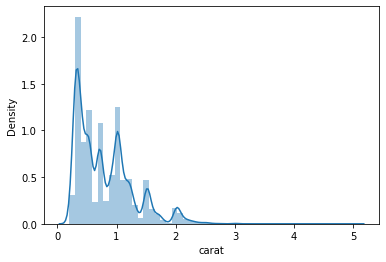

In [7]:
sns.distplot(diamonds['carat']);

<IPython.core.display.Javascript object>

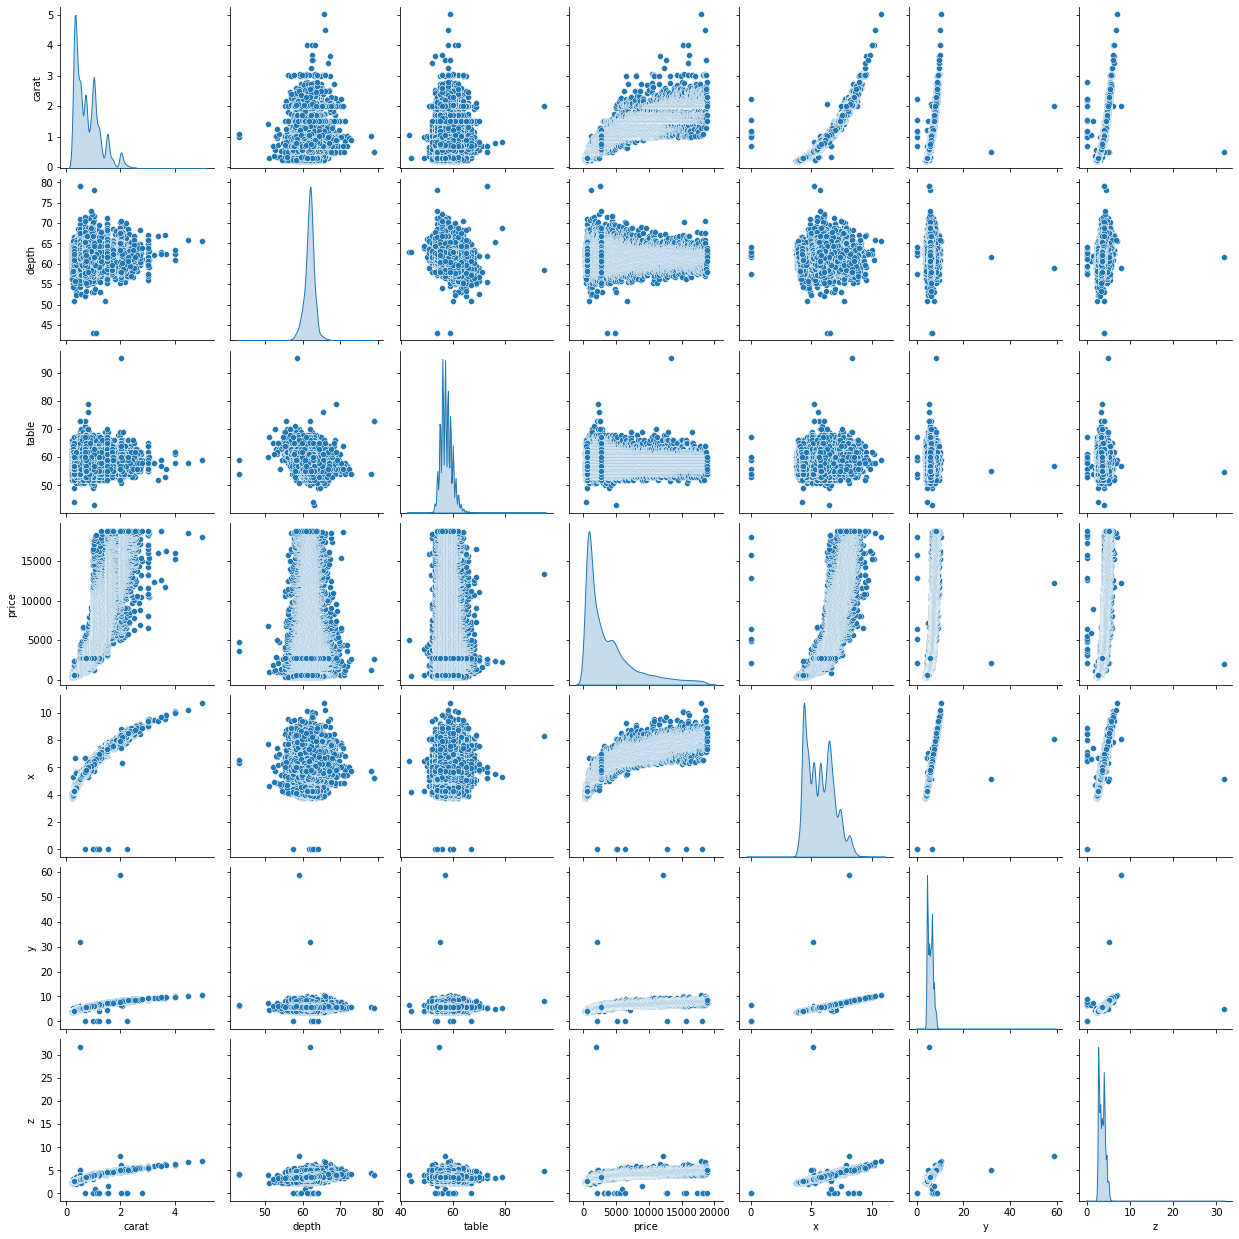

In [18]:
sns.pairplot(diamonds, diag_kind = 'kde')

In [46]:
corr = diamonds.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


In [43]:
corr = diamonds.corr()['price']

In [44]:
corr

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

In [48]:
diamonds_test = diamonds[~((diamonds['x'] == 0) & (diamonds['y'] == 0) & (diamonds['z']) ==0)]

In [52]:
diamonds_test = diamonds_test[~(diamonds_test['x'] == 0)]

diamonds_test

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
diamonds_test.loc[diamonds_test['z'] == 0,'z'] = (diamonds_test['depth']*(diamonds_test[x] + diamonds_test[y]))

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
X = diamonds[['carat']]
y = diamonds['price']

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
y_pred = model.predict(X)

In [16]:
X_all = X
y_predicted_all = model.predict(X_all)

In [31]:
X_all

,carat
0,0.21
1,0.23
2,0.29
3,0.31
4,0.24
...,...
48935,0.72
48936,0.72
48937,0.72
48938,0.70


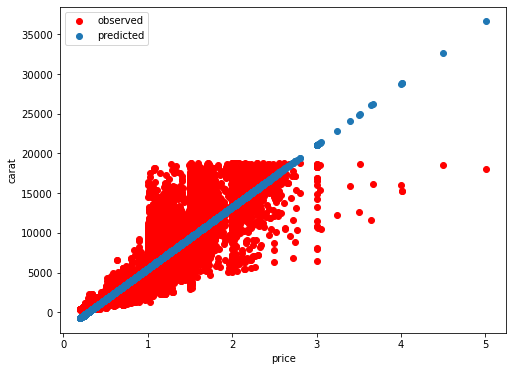

In [18]:
plt.figure(figsize=(8,6))
plt.xlabel('price')
plt.ylabel('carat')
plt.scatter(X, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X_all, y_predicted_all, label='predicted')


plt.legend();

In [19]:
model.coef_

array([7759.35277644])

In [20]:
model.intercept_

-2256.1316930738426

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_predicted_all)

2380375.235074832

In [23]:
diamonds['price'].mean()

3934.409644462607

In [25]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [6]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')

In [34]:
X_rick = rick_diamonds[['carat']]
y_predicted_rick = model.predict(X_rick)

In [33]:
X_rick

,carat
0,0.91
1,0.38
2,0.52
3,1.10
4,2.28
...,...
4995,0.30
4996,0.51
4997,1.01
4998,0.31


In [35]:
y_predicted_rick

array([4804.87933349,  692.42236197, 1778.73175068, ..., 5580.81461113,
        149.26766762,  304.45472315])

In [36]:
rick_diamonds['price_predicted'] = y_predicted_rick

In [39]:
rick_diamonds.to_csv('rick_diamonds_pred.csv')

In [53]:
mean_squared_error(y, y_predicted_rick)

ValueError: Found input variables with inconsistent numbers of samples: [48940, 5000]

Lets, uhhh, redo a first model based on the mean to see what happens

In [ ]:
model = LinearRegression()

In [62]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [59]:
mean_price = diamonds['price'].mean()
mean_price

3934.409644462607

In [63]:
 rick_diamonds['price_predicted'] = 3934.409644462607

In [66]:
 rick_diamonds.to_csv('rick_diamonds_mean.csv')

DATA TRANSFORMATION

In [7]:
diamonds_new = diamonds
diamonds_new.loc[diamonds['cut'] == 'Fair','cut'] = 1
diamonds_new.loc[diamonds['cut'] == 'Good','cut'] = 2
diamonds_new.loc[diamonds['cut'] == 'Very Good','cut'] = 3
diamonds_new.loc[diamonds['cut'] == 'Premium','cut'] = 4
diamonds_new.loc[diamonds['cut'] == 'Ideal','cut'] = 5

In [73]:
diamonds_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,5,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


NEW MODEL BASED ON CUTS

In [87]:
X = diamonds_new[['carat','cut']]
y = diamonds_new['price']

In [88]:
diamonds_new[['carat','cut']]

,carat,cut
0,0.21,4
1,0.23,2
2,0.29,4
3,0.31,2
4,0.24,3
...,...,...
48935,0.72,4
48936,0.72,5
48937,0.72,2
48938,0.70,3


In [89]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [92]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [98]:
rick_diamonds.loc[rick_diamonds['cut'] == 'Good','cut'] = 2
rick_diamonds.loc[rick_diamonds['cut'] == 'Very Good','cut'] = 3
rick_diamonds.loc[rick_diamonds['cut'] == 'Fair','cut'] = 1
rick_diamonds.loc[rick_diamonds['cut'] == 'Premium','cut'] = 4
rick_diamonds.loc[rick_diamonds['cut'] == 'Ideal','cut'] = 5

In [99]:
y_predicted_rick = model.predict(rick_diamonds[['carat','cut']])

In [101]:
rick_diamonds['price_predicted'] = y_predicted_rick

In [102]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,3,H,SI2,63.4,57.0,6.10,6.18,3.89,4581.585873
1,0.38,2,F,VS2,60.3,61.0,4.68,4.71,2.83,168.980019
2,0.52,5,H,VS2,61.8,56.0,5.19,5.16,3.20,2036.409252
3,1.10,5,G,VS1,61.3,56.0,6.65,6.69,4.09,6584.564584
4,2.28,5,G,SI2,61.6,57.0,8.44,8.37,5.18,15837.708191
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,3,D,SI2,62.2,59.0,4.25,4.30,2.66,-201.818873
4996,0.51,5,F,VVS2,61.9,56.0,5.09,5.14,3.16,1957.992780
4997,1.01,3,F,SI1,60.6,60.0,6.37,6.43,3.88,5365.750586
4998,0.31,5,F,VVS1,62.1,56.0,4.35,4.38,2.71,389.663356


In [103]:
rick_diamonds.to_csv('rick_diamonds_pred.csv')

Now with clarity

In [11]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,5,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,5,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,5,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,3,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,5,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,3,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,5,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [10]:
rick_diamonds.loc[rick_diamonds['cut'] == 'Good','cut'] = 2
rick_diamonds.loc[rick_diamonds['cut'] == 'Very Good','cut'] = 3
rick_diamonds.loc[rick_diamonds['cut'] == 'Fair','cut'] = 1
rick_diamonds.loc[rick_diamonds['cut'] == 'Premium','cut'] = 4
rick_diamonds.loc[rick_diamonds['cut'] == 'Ideal','cut'] = 5

In [12]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,5,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,5,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,5,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,3,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,5,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,3,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,5,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [8]:
diamonds_new.loc[diamonds['cut'] == 'Fair','cut'] = 1
diamonds_new.loc[diamonds['cut'] == 'Good','cut'] = 2
diamonds_new.loc[diamonds['cut'] == 'Very Good','cut'] = 3
diamonds_new.loc[diamonds['cut'] == 'Premium','cut'] = 4
diamonds_new.loc[diamonds['cut'] == 'Ideal','cut'] = 5

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,5,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [13]:
diamonds_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,5,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [14]:
diamonds_new.loc[diamonds['color'] == 'J','color'] = 1
diamonds_new.loc[diamonds['color'] == 'I','color'] = 2
diamonds_new.loc[diamonds['color'] == 'H','color'] = 3
diamonds_new.loc[diamonds['color'] == 'G','color'] = 4
diamonds_new.loc[diamonds['color'] == 'F','color'] = 5
diamonds_new.loc[diamonds['color'] == 'E','color'] = 6
diamonds_new.loc[diamonds['color'] == 'D','color'] = 7

In [18]:
diamonds_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,6,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,6,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,2,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,7,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,5,7,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,2,7,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,3,7,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [19]:
rick_diamonds.loc[rick_diamonds['color'] == 'J','color'] = 1
rick_diamonds.loc[rick_diamonds['color'] == 'I','color'] = 2
rick_diamonds.loc[rick_diamonds['color'] == 'H','color'] = 3
rick_diamonds.loc[rick_diamonds['color'] == 'G','color'] = 4
rick_diamonds.loc[rick_diamonds['color'] == 'F','color'] = 5
rick_diamonds.loc[rick_diamonds['color'] == 'E','color'] = 6
rick_diamonds.loc[rick_diamonds['color'] == 'D','color'] = 7

In [20]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,3,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,5,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,5,3,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,5,4,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,5,4,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,5,5,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,3,5,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,5,5,VVS1,62.1,56.0,4.35,4.38,2.71


In [21]:
diamonds_new.loc[diamonds['clarity'] == 'I1','clarity'] = 1
diamonds_new.loc[diamonds['clarity'] == 'SI2','clarity'] = 2
diamonds_new.loc[diamonds['clarity'] == 'SI1','clarity'] = 3
diamonds_new.loc[diamonds['clarity'] == 'VS2','clarity'] = 4
diamonds_new.loc[diamonds['clarity'] == 'VS1','clarity'] = 5
diamonds_new.loc[diamonds['clarity'] == 'VVS2','clarity'] = 6
diamonds_new.loc[diamonds['clarity'] == 'VVS1','clarity'] = 7
diamonds_new.loc[diamonds['clarity'] == 'IF','clarity'] = 8

In [25]:
rick_diamonds.loc[rick_diamonds['clarity'] == 'I1','clarity'] = 1
rick_diamonds.loc[rick_diamonds['clarity'] == 'SI2','clarity'] = 2
rick_diamonds.loc[rick_diamonds['clarity'] == 'SI1','clarity'] = 3
rick_diamonds.loc[rick_diamonds['clarity'] == 'VS2','clarity'] = 4
rick_diamonds.loc[rick_diamonds['clarity'] == 'VS1','clarity'] = 5
rick_diamonds.loc[rick_diamonds['clarity'] == 'VVS2','clarity'] = 6
rick_diamonds.loc[rick_diamonds['clarity'] == 'VVS1','clarity'] = 7
rick_diamonds.loc[rick_diamonds['clarity'] == 'IF','clarity'] = 8

In [27]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66
4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16
4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88
4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71


In [28]:
rick_diamonds.to_csv('rick_diamonds_updated')

In [29]:
diamonds_new.to_csv('diamonds_new_updated')

Ok lets restart it all

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
X = diamonds_new[['carat','cut','color','clarity']]
y = diamonds_new['price']

model.fit(X,y)

y_predicted_rick = model.predict(rick_diamonds[['carat','cut','color','clarity']])


In [32]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66
4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16
4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88
4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71


In [33]:
rick_diamonds['price_predicted'] = y_predicted_rick

In [34]:
rick_diamonds.to_csv('rick_diamonds_pred.csv')

Error with mean: 3980.71
Error with 1st model (carat): 1605.15
Error with 2nd model (cut and carat): 1578.53

In [35]:
#jesus christ bora criar uma função pra criar modelo

def cria_modelos(df):
    '''
    autoexplicativo convenhamos
    '''
    X = df[['carat']]
    y = df['price']

    model = LinearRegression()
    model.fit(X,y)
    price_pred = model.predict(rick_diamonds[['carat']])

    return price_pred